# HW2: Going Outside (Graph Search) using Q-learning 

https://www.cnblogs.com/dragonir/p/6224313.html (Chinese & English from the original page)

Read Lecture Slides #19-#20 in `11_QLearn.pdf`

In [4]:
import numpy as np
import random

gamma=0.8
Q=np.zeros([6,6])
R=np.array([[-1,-1,-1,-1,0,-1],  # 0
            [-1,-1,-1,0,-1,100], # 1
            [-1,-1,-1,0,-1,-1],  # 2
            [-1,0,0,-1,0,-1],    # 3
            [0,-1,-1,0,-1,100],  # 4
            [-1,0,-1,-1,0,100]]) # 5
print(np.array_str(R, precision=3))

[[ -1  -1  -1  -1   0  -1]
 [ -1  -1  -1   0  -1 100]
 [ -1  -1  -1   0  -1  -1]
 [ -1   0   0  -1   0  -1]
 [  0  -1  -1   0  -1 100]
 [ -1   0  -1  -1   0 100]]


### Python review before begining the QL code

In [5]:
# Python arrays review
print(R[1][5]) 
print(R[1,5])
print(R[1,])
print(R[1, [4,5] ])

100
100
[ -1  -1  -1   0  -1 100]
[ -1 100]


In [6]:
# enumerate test: to get a index and the value from the iterable at the same time.
for index, value in enumerate(R[0]):
  print(index, value)

0 -1
1 -1
2 -1
3 -1
4 0
5 -1


In [7]:
# Python review: to test int(np_array)
print(int(np.array([1]))) 

1


In [8]:
# a is an array of integers.
a = np.array([1, 2, 3, 4, 5, 6])

print ('Indices of elements > 3:')
i = np.where(a>3)
print(i)
print(i[0])
b = a[i] # a[i[0]] also works
print(b)

Indices of elements > 3:
(array([3, 4, 5]),)
[3 4 5]
[4 5 6]


### QL code for building Q-table

In [9]:
scores = []
for episode in range(900):
  currSt = random.randint(0,5) # initial state for the episode. 0 and 5 both included
  #print(f"\n*****Current State = {currSt}")
  flag = 0 # to handle if initial currSt chosen at randome is 5. 
           # without this, the last row of Q will be all zeros
  while flag == 0 or currSt != 5:
    flag = 1 
    nextSts_fr_currSt = []
    nextActs_fr_nextSt = []

    for index, value in enumerate(R[currSt]):
      if value != -1:
        nextSts_fr_currSt.append(index)
    #print(f"possible actions (reachable states) from Current State = {nextSts_fr_currSt}")

    nextSt = random.choice(np.array(nextSts_fr_currSt)) # choice(): we can get a random sample from 1Darray
    #print(f"chosen next action = {nextSt}")
    for index, value in enumerate(R[nextSt]):
      if value != -1:
        nextActs_fr_nextSt.append(index)
    #print(f"possible actions (reachable states) from next_st = {nextActs_fr_nextSt}")
    #print(f"  Before gamma*max: {Q[nextSt, nextActs_fr_nextSt]}")
    Q[currSt, nextSt] = R[currSt, nextSt] + gamma*max(Q[nextSt, nextActs_fr_nextSt]) # See sample code below to understand
    #Q[currSt, nextSt] =  gamma*max(R[currSt, nextSt] + Q[nextSt, nextActs_fr_nextSt])
    #print(f"  Updated: {Q[currSt, nextSt]}")
    currSt = nextSt

  # to graph for each episode
  if (np.max(Q) > 0):
    scores.append(np.sum(Q/np.max(Q)*100))
  else:
    scores.append(0)

print(np.array_str(Q, precision=1), end='\n\n')
print(np.array_str(Q*100/np.max(Q), precision=0))

[[  0.   0.   0.   0. 400.   0.]
 [  0.   0.   0. 320.   0. 500.]
 [  0.   0.   0. 320.   0.   0.]
 [  0. 400. 256.   0. 400.   0.]
 [320.   0.   0. 320.   0. 500.]
 [  0. 400.   0.   0. 400. 500.]]

[[  0.   0.   0.   0.  80.   0.]
 [  0.   0.   0.  64.   0. 100.]
 [  0.   0.   0.  64.   0.   0.]
 [  0.  80.  51.   0.  80.   0.]
 [ 64.   0.   0.  64.   0. 100.]
 [  0.  80.   0.   0.  80. 100.]]


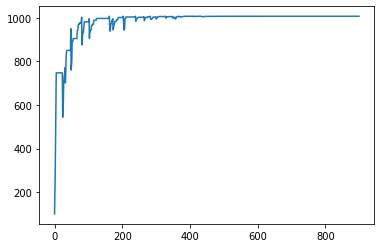

In [10]:
import pylab as plt
plt.plot(scores)
plt.show()

### using the Q-table for testing (finding the best path)

In [21]:
currSt = 2
steps = [currSt]

while currSt != 5:
    # ------ complete this part ----------
    nextSt = np.argmax(Q[currSt])

    steps.append(nextSt) # complete this line
    currSt = nextSt       # complete this line

print(f"Most efficient path: {steps}")

Most efficient path: [2, 3, 1, 5]


In [22]:
# Function to build Q-Table
def QLearn(r, q, n):
  scores = []
  for episode in range(900):
    currSt = random.randint(0,n) # initial state for the episode. 0 and 5 both included
    #print(f"\n*****Current State = {currSt}")
    flag = 0 # to handle if initial currSt chosen at randome is 5. 
           # without this, the last row of Q will be all zeros
    while flag == 0 or currSt != n:
      flag = 1 
      nextSts_fr_currSt = []
      nextActs_fr_nextSt = []

      for index, value in enumerate(r[currSt]):
        if value != -1:
          nextSts_fr_currSt.append(index)
      #print(f"possible actions (reachable states) from Current State = {nextSts_fr_currSt}")

      nextSt = random.choice(np.array(nextSts_fr_currSt)) # choice(): we can get a random sample from 1Darray
      #print(f"chosen next action = {nextSt}")
      for index, value in enumerate(r[nextSt]):
        if value != -1:
          nextActs_fr_nextSt.append(index)
      #print(f"possible actions (reachable states) from next_st = {nextActs_fr_nextSt}")
      #print(f"  Before gamma*max: {Q[nextSt, nextActs_fr_nextSt]}")
      q[currSt, nextSt] = r[currSt, nextSt] + gamma*max(q[nextSt, nextActs_fr_nextSt]) # See sample code below to understand
      #Q[currSt, nextSt] =  gamma*max(R[currSt, nextSt] + Q[nextSt, nextActs_fr_nextSt])
      #print(f"  Updated: {Q[currSt, nextSt]}")
      currSt = nextSt

    # to graph for each episode
    if (np.max(q) > 0):
      scores.append(np.sum(q/np.max(q)*100))
    else:
      scores.append(0)

  #print(np.array_str(Q, precision=1), end='\n\n')
  print(np.array_str(q*100/np.max(q), precision=0))
  plt.plot(scores)
  plt.show()
  
# Function to test (find best paths from each room)
def test(q, n):
  currNum = 0
  while currNum != n:
    currSt = currNum
    steps = [currSt]

    while currSt != n:
      # ------ complete this part ----------
      nextSt = np.argmax(q[currSt])

      steps.append(nextSt) # complete this line
      currSt = nextSt       # complete this line

    print(f"Most efficient path: {steps}")
    currNum += 1

------------------------ Peghotys House ------------------------
[[  0.   0.   0.   0.  80.   0.]
 [  0.   0.   0.  64.   0. 100.]
 [  0.   0.   0.  64.   0.   0.]
 [  0.  80.  51.   0.  80.   0.]
 [ 64.   0.   0.  64.   0. 100.]
 [  0.  80.   0.   0.  80. 100.]]


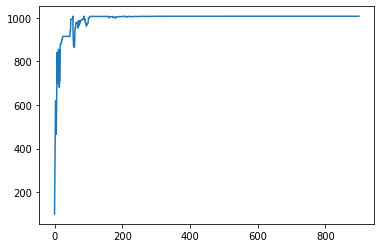

Most efficient path: [0, 4, 5]
Most efficient path: [1, 5]
Most efficient path: [2, 3, 1, 5]
Most efficient path: [3, 1, 5]
Most efficient path: [4, 5]

------------------------ Chungs House ------------------------
[[  0.   0.   0.   0.   0.  51.   0.]
 [  0.   0.   0.   0.  64.   0. 100.]
 [  0.   0.   0.  64.   0.   0. 100.]
 [  0.   0.  80.   0.  64.   0.   0.]
 [  0.  80.   0.  64.   0.  51.   0.]
 [ 41.   0.   0.   0.  64.   0.   0.]
 [  0.  80.  80.   0.   0.   0. 100.]]


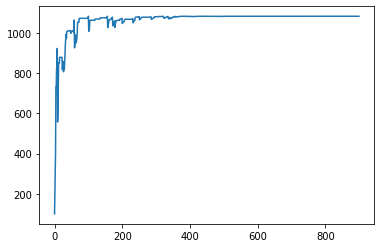

Most efficient path: [0, 5, 4, 1, 6]
Most efficient path: [1, 6]
Most efficient path: [2, 6]
Most efficient path: [3, 2, 6]
Most efficient path: [4, 1, 6]
Most efficient path: [5, 4, 1, 6]


In [26]:
# Main
Q1=np.zeros([6,6])
R1=np.array([[-1,-1,-1,-1,0,-1],  # 0
            [-1,-1,-1,0,-1,100],  # 1
            [-1,-1,-1,0,-1,-1],   # 2
            [-1,0,0,-1,0,-1],     # 3
            [0,-1,-1,0,-1,100],   # 4
            [-1,0,-1,-1,0,100]])  # 5
print('------------------------ Peghotys House ------------------------')
QLearn(R1, Q1, 5)
test(Q1, 5)

Q2=np.zeros([7,7])
R2=np.array([[-1,-1,-1,-1,-1,0,-1],  # 0
             [-1,-1,-1,-1,0,-1,100], # 1
             [-1,-1,-1,0,-1,-1,100], # 2
             [-1,-1,0,-1,0,-1,-1],   # 3
             [-1,0,-1,0,-1,0,-1],    # 4
             [0,-1,-1,-1,0,-1,-1],   # 5
             [-1,0,0,-1,-1,-1,100]]) # 6
print('\n------------------------ Chungs House ------------------------')
QLearn(R2, Q2, 6)
test(Q2, 6)